In [1]:

import os
current_path = os.getcwd()
import numpy as np
from numpy import seterr
seterr(all='raise')
import matplotlib.pyplot as plt
import math
import random
from tqdm import tqdm
import sys
sys.path.append(current_path)
sys.path.append(current_path+'/../../')
import myInput
import PACKAGE_MP_Linear as linear2d
import post_processing
sys.path.append(current_path+'/../calculate_tangent/')


In [2]:

def plot_structure_figure(step, structure_figure, figure_path):

    plt.close()
    fig, ax = plt.subplots()

    cv_initial = np.squeeze(structure_figure[0])
    cv0 = np.squeeze(structure_figure[step])
    cv0 = np.rot90(cv0,1)
    im = ax.imshow(cv0,vmin=np.min(cv_initial),vmax=np.max(cv_initial),cmap='rainbow',interpolation='none') #jet rainbow plasma
    # cb = fig.colorbar(im)
    # cb.set_ticks([10000,20000])
    # cb.set_ticklabels([ '1e4', '2e4'])
    # cb.ax.tick_params(labelsize=20)
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    ax.tick_params(which = 'both', size = 0, labelsize = 0)

    plt.savefig(figure_path + f"_ts{step*30}.png", dpi=400,bbox_inches='tight')



The Iso data size is: (201, 2400, 2400, 1)


 23%|██▎       | 46/201 [00:07<00:25,  6.03it/s]


Figure Iso done
The Well data size is: (201, 2400, 2400, 1)


 22%|██▏       | 44/201 [00:07<00:26,  5.92it/s]


Figure Well done
The Cos data size is: (201, 2400, 2400, 1)


 22%|██▏       | 45/201 [00:07<00:27,  5.76it/s]


Figure Cos done
The CosMin1 data size is: (201, 2400, 2400, 1)


 42%|████▏     | 85/201 [00:14<00:19,  5.86it/s]


Figure CosMin1 done
The CosMax1Mobility data size is: (201, 2400, 2400, 1)


 48%|████▊     | 97/201 [00:16<00:17,  6.06it/s]


Figure CosMax1Mobility done


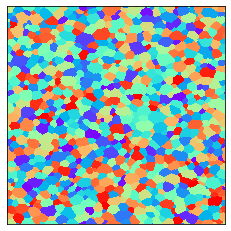

In [13]:

if __name__ == '__main__':
    # File name
    npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/2d_poly_wellEnergy/results/"
    
    file_types_name = ["Iso", "Well", "Cos", "CosMin1", "CosMax1Mobility"]
    energy_types = ["Cos", "Well", "Cos", "CosMin1", "CosMax1Mobility"]
    energy_delta = ["0.0", "0.8", "0.8", "0.8", "0.8"]
    
    for i in range(len(file_types_name)):
        npy_file_name = f"p_aveE_20000_{energy_types[i]}_delta{energy_delta[i]}_J1_refer_1_0_0_seed56689_kt0.66.npy"
        npy_file = np.load(npy_file_folder + npy_file_name)
        print(f"The {file_types_name[i]} data size is: {npy_file.shape}")
        
        # Initial container
        initial_grain_num = 20000
        step_num = npy_file.shape[0]
        
        expected_grain_num = 1000
        # Calculate the number of grains
        grain_num_array = np.zeros(expected_grain_num)
        for num_i in tqdm(range(step_num)):
            current_grain_num = len(np.unique(npy_file[num_i,:]))  
            grain_num_array[num_i] = current_grain_num
            if current_grain_num < expected_grain_num/2: break
        # Calculate the expected step
        special_step = np.argmin(abs(grain_num_array - expected_grain_num))
        
        # Start microstructure figure
        figure_path = current_path + f"/microstructure_figures/microstructure_poly20k_inclination_{file_types_name[i]}"
        plot_structure_figure(special_step, npy_file[:,:,:,0], figure_path)
        print(f"Figure {file_types_name[i]} done")
    
    
    
    